In [76]:
import pandas as pd
import os
import numpy as np
import scipy as ss
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import print_function
import cobra
from corda import reaction_confidence
from corda import CORDA

In [65]:
data = "/Users/annasintsova/git_repos/"\
        "HUTI-RNAseq/data/get_homologs_output/C50_S90_e0_/"\
        "run_C50_S90_e0__pan_C50_S90/"\
        "2018-02-26_pangenome_matrix_t0_crossRef.csv"
model = "/Users/annasintsova/git_repos/"\
        "HUTI-RNAseq/analysis/fba/2017-12-16-model-2/"\
        "data/HM54_homologues/HM54_model/HM54_iML1515.xml"
        

In [32]:
counts = pd.read_csv(data)
HM54_rpkm = counts[["MG1655", "HM54_UR_RPKM", "HM54_UTI_RPKM"]]
HM54_rpkm = HM54_rpkm.dropna(subset=["MG1655"])
HM54_rpkm = HM54_rpkm[HM54_rpkm.MG1655 != "PARALOGS"]
HM54_rpkm.set_index('MG1655', inplace=True)
HM54_rpkm = HM54_rpkm.dropna()

(3120, 2)

In [20]:
def invnorm(x):
    return scipy.stats.norm.ppf((x.rank() -0.5)/x.count())

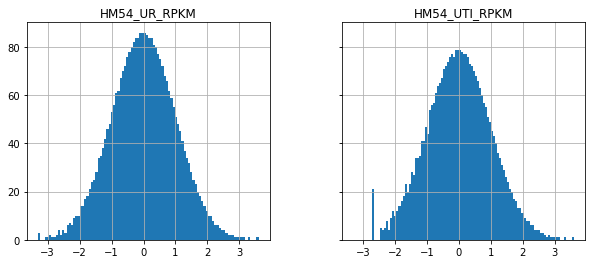

In [48]:
HM54_norm = HM54_rpkm.apply(invnorm)
HM54_norm.hist(sharex=True, sharey=True, figsize=(10,4),bins=100);

In [54]:

def assignConfidence(x):
    if x > 1.0:
        return 3
    elif x > -1.0:
        return 2
    elif x > -2.0:
        return 1
    elif x <= -2.0:
        return -1

In [64]:
confidences = {'UR_conf':list(map(assignConfidence, HM54_norm.HM54_UR_RPKM.values)),
               'UTI_conf':list(map(assignConfidence, HM54_norm.HM54_UTI_RPKM.values))}
HM54 = pd.DataFrame(confidences,index = HM54_norm.index)


(3120, 2)

In [70]:
ur_conf = HM54.UR_conf.to_dict()
uti_conf = HM54.UTI_conf.to_dict()

In [67]:
base = cobra.io.read_sbml_model(model)

In [74]:
#URINE
conf = {}
for r in base.reactions:
    conf[r.id]=reaction_confidence(r.gene_reaction_rule, ur_conf)

In [ ]:
opt = CORDA(base, conf,)
opt.build()
opt

In [ ]:
print([opt.model.reactions.get_by_id(k).id for k, 
       used in opt.included.items() if used])